### Outlier Detection by Z-Score method for Normally Distributed Data

In [38]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [39]:
df=pd.read_csv('placement.csv')

In [40]:
df.sample(5)

,cgpa,placement_exam_marks,placed
116,7.16,21.0,0
823,6.67,18.0,0
297,7.03,32.0,1
820,6.27,16.0,0
998,8.62,46.0,1


In [41]:
df.shape

(1000, 3)

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

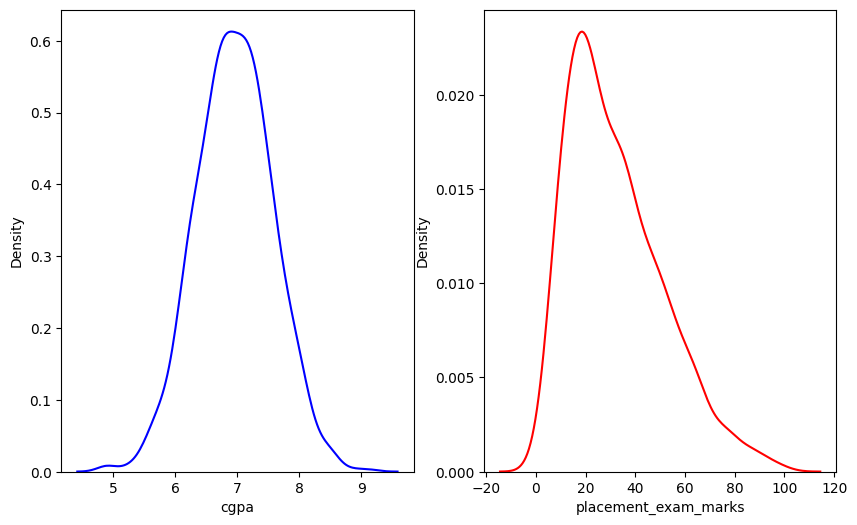

In [42]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.kdeplot(df['cgpa'],fill=False, color='blue')

plt.subplot(1,2,2)
sns.kdeplot(df['placement_exam_marks'],fill=False, color='red')

- cgpa is normally distributed data , so we apply z score method on the cgpa column only 

In [43]:
print('Mean of cgpa:',df['cgpa'].mean())
print('Standard deviation of cgpa:',df['cgpa'].std())
print('Max of cgpa:',df['cgpa'].max())
print('Min of cgpa:',df['cgpa'].min())

Mean of cgpa: 6.96124
Standard deviation of cgpa: 0.6158978751323896
Max of cgpa: 9.12
Min of cgpa: 4.89


## aproach one 

In [44]:
print("Highest allowed:",df['cgpa'].mean()+3*df['cgpa'].std())
print("Lowest allowed:",df['cgpa'].mean()-3*df['cgpa'].std())

Highest allowed: 8.808933625397168
Lowest allowed: 5.113546374602832


In [45]:
df[(df['cgpa'] <5.11) | (df['cgpa']>8.80)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


#### Trimming 

In [46]:
new_df=df[(df['cgpa']>5.11) & (df['cgpa']<8.80)]
new_df.shape

(995, 3)

### Z_score Approach 

In [47]:
# z_score calculation 
df['z_score']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [48]:
df[(df['z_score']< - 3) | (df['z_score'] > 3)]

,cgpa,placement_exam_marks,placed,z_score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [49]:
new_df=df[(df['z_score']>-3) & (df['z_score']<3)]
new_df

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


### Capping 

In [53]:
df.head()

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [56]:
lower_limit=df['cgpa'].mean() - 3 * df['cgpa'].std()
upper_limit=df['cgpa'].mean() + 3 * df['cgpa'].std()

In [57]:
lower_limit

5.113546374602832

In [58]:
upper_limit

8.808933625397168

In [59]:
df['cgpa']=np.where((df['cgpa']>upper_limit), upper_limit, np.where((df['cgpa']<lower_limit),lower_limit,df['cgpa']))

In [61]:
df

,cgpa,placement_exam_marks,placed,z_score
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239
